In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd. read_csv("Mall_Customers.csv")

In [9]:
df.shape

(200, 5)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
#droping CustomerID column as it is not making an important contribution while KNN
df.drop('CustomerID',axis =1,inplace = True)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
df.rename(columns = {"Annual Income (k$)" :"Annual Income", "Spending Score (1-100)": "Spending Score" }, inplace= True)

In [46]:
df['Annual Income'] = df['Annual Income'] * 1000
df['Gender'] = np.where(df['Gender']=="Male",1,0)   ### ASsigning 1 to Male and 0 to Femle in gender
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15000000,39
1,1,21,15000000,81
2,0,20,16000000,6
3,0,23,16000000,77
4,0,31,17000000,40


In [47]:
#seperating X and y
x = df.loc[:,['Age','Annual Income','Gender']].values   ### Creating X with columns age annual income and gender
y = df.loc[:,['Spending Score']].values    ###  Creating Y with Spending score

In [48]:
x

array([[       19,  15000000,         1],
       [       21,  15000000,         1],
       [       20,  16000000,         0],
       [       23,  16000000,         0],
       [       31,  17000000,         0],
       [       22,  17000000,         0],
       [       35,  18000000,         0],
       [       23,  18000000,         0],
       [       64,  19000000,         1],
       [       30,  19000000,         0],
       [       67,  19000000,         1],
       [       35,  19000000,         0],
       [       58,  20000000,         0],
       [       24,  20000000,         0],
       [       37,  20000000,         1],
       [       22,  20000000,         1],
       [       35,  21000000,         0],
       [       20,  21000000,         1],
       [       52,  23000000,         1],
       [       35,  23000000,         0],
       [       35,  24000000,         1],
       [       25,  24000000,         1],
       [       46,  25000000,         0],
       [       31,  25000000,     

In [49]:
y

array([[39],
       [81],
       [ 6],
       [77],
       [40],
       [76],
       [ 6],
       [94],
       [ 3],
       [72],
       [14],
       [99],
       [15],
       [77],
       [13],
       [79],
       [35],
       [66],
       [29],
       [98],
       [35],
       [73],
       [ 5],
       [73],
       [14],
       [82],
       [32],
       [61],
       [31],
       [87],
       [ 4],
       [73],
       [ 4],
       [92],
       [14],
       [81],
       [17],
       [73],
       [26],
       [75],
       [35],
       [92],
       [36],
       [61],
       [28],
       [65],
       [55],
       [47],
       [42],
       [42],
       [52],
       [60],
       [54],
       [60],
       [45],
       [41],
       [50],
       [46],
       [51],
       [46],
       [56],
       [55],
       [52],
       [59],
       [51],
       [59],
       [50],
       [48],
       [59],
       [47],
       [55],
       [42],
       [49],
       [56],
       [47],
       [54],
       [53],

In [50]:
#### Feature Scaling 
### In KNN Algorithm the Feature scaling is necessary

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [51]:
#model was expecting a 1d array as input
y = y.reshape(-1)

In [52]:
y.shape

(200,)

In [53]:
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [54]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)

In [55]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X

In [57]:
###### Selcting value of K

accu_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    accu_list.append(accu)
    err_list.append(1-accu)

C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current u

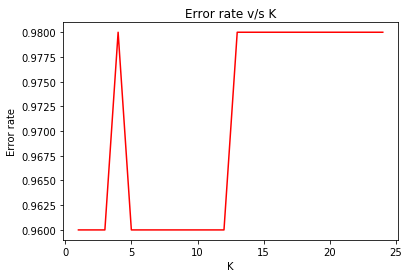

In [60]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [64]:
###  From Above Graph we can select k as 5

In [71]:
### Model BUilding
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [72]:
### Module Evalution
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
accuracy_score(y_test,y_pred)

0.04